In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_context('notebook', font_scale=1.3)

# Load data

In [2]:
VERSION = 1.0
df = pd.read_csv(f'../data/human/{VERSION}/robot.csv').set_index('pid')
pdf = pd.read_csv(f'../data/human/{VERSION}/participants.csv').set_index('pid')
slider = pd.read_csv(f'../data/human/{VERSION}/slider.csv').set_index('pid')

pdf['condition'] = (~pdf.number.isna()).astype(int)
df['condition'] = pdf.condition
slider['condition'] = pdf.condition

# df['completed'] = pdf.completed
# df.completed = df.completed.fillna(False)
# pdf = pdf.query('completed')
# df = df.query('completed')

# Land guesses

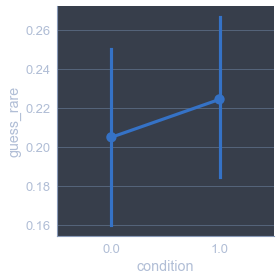

In [3]:
df = df.query('response != "b"')  # this shouldn't be possible
df['guess_rare'] = df.response == 'k'
sns.factorplot('condition', 'guess_rare', data=df)

# Correlation judgements

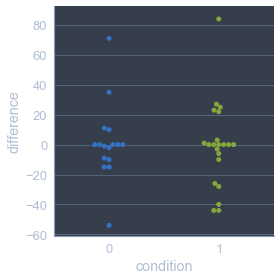

In [7]:
yellow_frequency = slider.reset_index().set_index(['tag', 'pid']).responses
pdf['difference'] = yellow_frequency.loc['kizik'] - yellow_frequency.loc['daxby']
sns.factorplot('condition', 'difference', data=pdf, kind='swarm')

# Memory task

In [9]:
pff['gue'] = abs(pdf.difference) > 10

pid
0      True
1      True
2     False
3     False
4      True
5     False
6     False
7      True
8      True
9      True
10     True
11     True
12    False
13     True
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25     True
26     True
27    False
28    False
29     True
30    False
31     True
32    False
33     True
34     True
35    False
36    False
37     True
Name: difference, dtype: bool

In [124]:
from ast import literal_eval
pdf.guesses.dropna().apply(lambda x: literal_eval(x.replace(r'\n', '').replace(' ', '')))

pid
0                           [0815371, 0815371, 0815371]
1                                                    []
2                           [0824884, 0824884, 0824884]
3                                                    []
4                                                    []
5                           [1444584, 1444584, 1444584]
6                           [7099211, 7099211, 7099211]
7                                                    []
8     [5014685501468550146855014685, 8654, 501468550...
9                           [3566913, 3566913, 3566913]
10                                                   []
11                           [2674619, 267419, 2674619]
12                          [9388760, 9388760, 9388760]
13                                                   []
14                          [2765740, 2765740, 2765740]
15                          [4909386, 4909386, 4909386]
16                          [2908832, 2908832, 2908832]
17                          [2785174, 278517